In [1]:
# Jupyter 노트북 기준 ─ notebooks/ 폴더 안에서 실행한다고 가정
import sys
from pathlib import Path

# 1. 프로젝트 루트를 notebooks/의 한 단계 위로 설정
project_root = Path.cwd().parent          # ex) .../open-cv-flow

# 2. PYTHONPATH에 최우선 삽입
sys.path.insert(0, project_root.as_posix())

# 3. 정상 import
from src.data_manager import DataManager


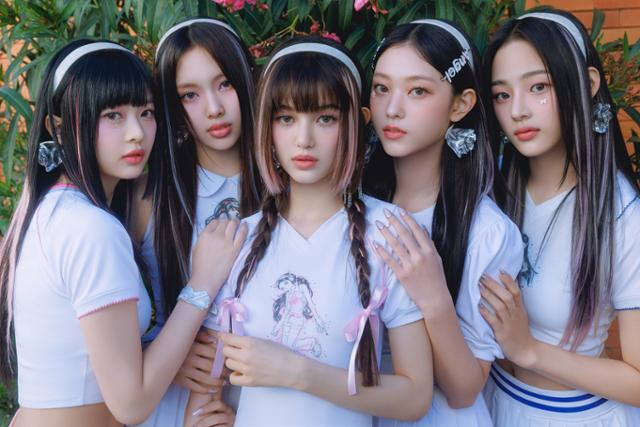

In [2]:
# 방법 1 — IPython.display (가장 간단)
from IPython.display import Image, display
display(Image('../tests/images/image.png'))    # 로컬 파일

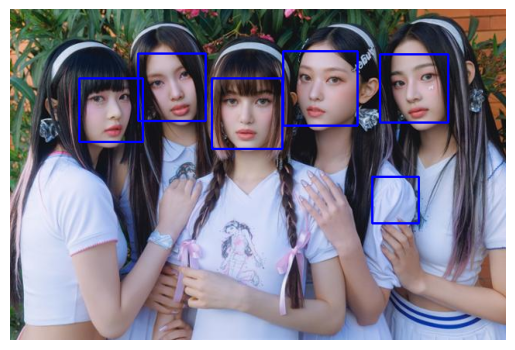

In [8]:
from pathlib import Path
from matplotlib import pyplot as plt
from src.features.modules.face_detection import FaceDetection
import cv2

project_root = Path.cwd().parent  # 현재 작업 디렉터리의 상위 폴더를 루트로 설정
img_path = project_root / 'tests' / 'images' / 'image.png'

data = FaceDetection(str(img_path))
img = data.detect_faces()

for face in data.faces:
    x, y, w, h = face.position
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [9]:
# 얼굴 위치 그리기 (그레이스케일)
gray_with_box = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
for face in fd.faces:
    x, y, w, h = face.position
    cv2.rectangle(gray_with_box, (x, y), (x + w, y + h), (0, 0, 255), 2)  # 빨간 박스

# 얼굴 위치 원본 RGB 이미지에 그리기
for face in fd.faces:
    x, y, w, h = face.position
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)  # 파란 박스

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Grayscale with Faces')
plt.imshow(cv2.cvtColor(gray_with_box, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Original with Faces')
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


NameError: name 'gray' is not defined

In [ ]:
# --- 기존 전처리 ---
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# --- (추가) CLAHE로 대비 향상 ---
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_for_detect = clahe.apply(gray)     # 여기서 contrast‑boost

faces = detector.detectMultiScale(
    gray_for_detect,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

# --- 이후 로직은 그대로 ---
gray_with_box = cv2.cvtColor(gray_for_detect, cv2.COLOR_GRAY2BGR)
for face in fd.faces:
    x, y, w, h = face.position
    cv2.rectangle(gray_with_box, (x, y), (x + w, y + h), (0, 0, 255), 2)

for face in fd.faces:
    x, y, w, h = face.position
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Grayscale with Faces')
plt.imshow(cv2.cvtColor(gray_with_box, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Original with Faces')
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
